In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PatNode = np.array

# left, right, up, down
moves = {
    'l': PatNode([-2, 0]),
    'r': PatNode([2, 0]),
    'u': PatNode([0, 2]),
    'd': PatNode([0, -2]),

    'r_u': PatNode([2, 2]),
    'r_d': PatNode([2, -2]),
    'l_u': PatNode([-2, 2]),
    'l_d': PatNode([-2, -2]),
}

class PatCursor():
    def __init__(self, G, start):
        self.G = G
        self.cursor = start
        
    def move(self, other, half=False):
        if half:
            new_cursor = (self.cursor + other / 2).astype(int)
        else:
            new_cursor = self.cursor + other
        self.G.add_edge(tuple(self.cursor), tuple(new_cursor))
        self.cursor = new_cursor
        
    def fork(self):
        return (PatCursor(self.G, self.cursor),
                PatCursor(self.G, self.cursor))


In [3]:
rep = lambda g: nx.linalg.graphmatrix.adjacency_matrix(g).todense()

In [4]:
def show_pat(G, lw=10, wh=[1,1]):
    min_x = min(G.nodes, key=lambda v: v[0])[0]
    max_x = max(G.nodes, key=lambda v: v[0])[0]
    min_y = min(G.nodes, key=lambda v: v[1])[1]
    max_y = max(G.nodes, key=lambda v: v[1])[1]
    
    plt.rcParams['figure.figsize'] = wh
    plt.xlim(min_x - 2, max_x + 2)
    plt.ylim(min_y - 2, max_y + 2)
    
    
    for (x1,y1), (x2,y2) in G.edges:
        line = plt.Line2D((x1,x2), (y1,y2), lw=lw, c='white')
        plt.gca().add_line(line)
        
    plt.gca().set_facecolor("black")

    #plt.axis('off')
    plt.show()  


In [5]:
def apply_pat(parts, c=None):
    if c is None:
        c = PatCursor(nx.Graph(), PatNode([0,0]))
    
    for line in parts.split('\n'):
        for move in line.strip().split(' '):
            if not move:
                continue
            half = move.endswith('%')
            move = move.replace('%', '')
            c.move(moves[move], half=half)
        
    return c

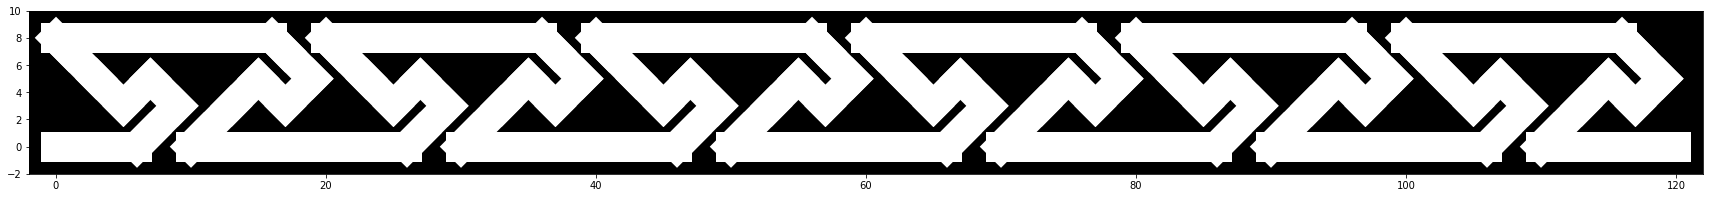

In [6]:
def basic_pat(c):
    return apply_pat('''
        r r r
        r_u% r_u
        l_u
        l_d
        l_u l_u l_u%
        r r r r r r r r
        r_d% r_d l_d l_u l_d l_d l_d%
        r r r r r
    ''', c)

c = None
for i in range(6):
    c = basic_pat(c)
show_pat(c.G, lw=30, wh=[30, 3])